**Purpose**

The purpose of this notebook is to graph data from experiments testing the ability of different bacteria to grow on Neu5Ac at different starting pHs.

In [1]:
from elliot_utils import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
filepath = Path.cwd().joinpath('analysis_files/glycan_growth/')
figurepath = Path.cwd().joinpath('figures/glycan_growth/')     

In [3]:
# Function to convert growth curve data from a .csv file into a pandas dataframe for processing/graphing
# Returns: A pandas dataframe with headers 'Strain', 'Treatment', 'pH', 'OD600', 'Hours'
# dataDF: The Dataframe generated by pd.read_csv() of a .csv file with growth curve data in it.
#       This function expects that data to have headers: "Hours", "A1", "A2", etc. The "Hours" header is required.
# strainLocs: A 2D list in the format list[row][column] representing what strains were in what wells of the 96 well plate. Empty wells must have an empty string.
# treatmentLocs: A 2D list in the format list[row][column] representing what treatments were in what wells of the 96 well plate. Empty wells must have an empty string.
# pHLocs: A 2D list in the format list[row][column] representing what treatments were in what wells of the 96 well plate. Empty wells must have an empty string.
def curveData2dfPH(dataDF, strainLocs, treatmentLocs, pHLocs):
    dataDict = {'Strain':[], 'Treatment':[], 'pH':[], 'OD600':[], 'Hours':[]}
    hrs = []
    for x in dataDF['Hours']:
        hrs.append(x)
    letterIndex = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7}
    for k in dataDF.keys():
        if k == 'Hours':
            continue
        rowVal = letterIndex[k[0]]
        colVal = int(k[1:]) - 1
        strain = strainLocs[rowVal][colVal]
        treatment = treatmentLocs[rowVal][colVal]
        pH = pHLocs[rowVal][colVal]
        for i in range(len(dataDF[k])):
            dataDict['OD600'].append(dataDF[k][i])
            dataDict['Hours'].append(hrs[i])
            dataDict['Strain'].append(strain)
            dataDict['Treatment'].append(treatment)
            dataDict['pH'].append(pH)
    return pd.DataFrame(dataDict)

# Returns: The dataDF appended with a new column representing the OD600 for the sample at the given time minus its starting OD600
# dataDF: Dataframe output by the curveData2df function
def calculateDeltaOD(dataDF):
    startingOD = None
    deltaODs = []
    for index, row in dataDF.iterrows():
        if row['Hours'] == 0:
            startingOD = row['OD600']
            deltaODs.append(0)
        else:
            deltaODs.append(row['OD600'] - startingOD)
    dataDF['Delta OD600'] = deltaODs

# Returns: A subset DataFrame of "df" with only data for the specified strains and treatments
# df: A DataFrame generated by the curveData2df function. It will have the headers 'Treatment', 'OD600', 'Hours'
# keys: A list of all the keys to select on
# values: A list of lists where values[n] is a list of all the values to include for keys[n]
# If time limit is set, will only return up to the given time point in hours (inclusive)
# If treatments is set to a list, will only return values for those treatments
def sliceDFBy(df, keys, values, timeLimit=1000000000000):
    dataDict = {}
    for key in df.keys():
        dataDict[key] = []
    for index, row in df.iterrows():
        include = True
        for k in keys:
            keyIndex = keys.index(k)
            if not row[k] in values[keyIndex]:
                include = False
        if include:
            for key in dataDict.keys():
                dataDict[key].append(row[key])
    return pd.DataFrame(dataDict)

# Returns the data for each replicate at the given timepoint
def getEndpointData(df, timepoint):
    dataDict = {}
    for key in df.keys():
        dataDict[key] = []
    for index, row in df.iterrows():
        if row['Hours'] == timepoint:
            for key in dataDict.keys():
                dataDict[key].append(row[key])
    return pd.DataFrame(dataDict)

pHPalette = ['black', 'purple', 'blue', 'skyblue', 'brown', 'red', 'orange', 'pink']

In [4]:
data111524 = pd.read_csv(filepath.joinpath('11-15-24_neu5ac_ph.csv'))

In [5]:
strainLocs = [
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US'],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US'],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US'],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US'],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US'],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US'],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US'],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US'],
]
treatmentLocs = [
    ['Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac'],
    ['Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac'],
    ['Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac'],
    ['Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac'],
    ['Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac'],
    ['Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac'],
    ['Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac'],
    ['Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac', 'Neu5Ac'],
]
pHLocs = [
    ['pH 7.5', 'pH 7.5', 'pH 7.5', 'pH 7.5', 'pH 7.5', 'pH 7.5', 'pH 7.5', 'pH 7.5', 'pH 7.5', 'pH 7.5', 'pH 7.5', 'pH 7.5'],
    ['pH 7.0', 'pH 7.0', 'pH 7.0', 'pH 7.0', 'pH 7.0', 'pH 7.0', 'pH 7.0', 'pH 7.0', 'pH 7.0', 'pH 7.0', 'pH 7.0', 'pH 7.0'],
    ['pH 6.5', 'pH 6.5', 'pH 6.5', 'pH 6.5', 'pH 6.5', 'pH 6.5', 'pH 6.5', 'pH 6.5', 'pH 6.5', 'pH 6.5', 'pH 6.5', 'pH 6.5'],
    ['pH 6.0', 'pH 6.0', 'pH 6.0', 'pH 6.0', 'pH 6.0', 'pH 6.0', 'pH 6.0', 'pH 6.0', 'pH 6.0', 'pH 6.0', 'pH 6.0', 'pH 6.0'],
    ['pH 5.5', 'pH 5.5', 'pH 5.5', 'pH 5.5', 'pH 5.5', 'pH 5.5', 'pH 5.5', 'pH 5.5', 'pH 5.5', 'pH 5.5', 'pH 5.5', 'pH 5.5'],
    ['pH 5.0', 'pH 5.0', 'pH 5.0', 'pH 5.0', 'pH 5.0', 'pH 5.0', 'pH 5.0', 'pH 5.0', 'pH 5.0', 'pH 5.0', 'pH 5.0', 'pH 5.0'],
    ['pH 4.5', 'pH 4.5', 'pH 4.5', 'pH 4.5', 'pH 4.5', 'pH 4.5', 'pH 4.5', 'pH 4.5', 'pH 4.5', 'pH 4.5', 'pH 4.5', 'pH 4.5'],
    ['pH 4.0', 'pH 4.0', 'pH 4.0', 'pH 4.0', 'pH 4.0', 'pH 4.0', 'pH 4.0', 'pH 4.0', 'pH 4.0', 'pH 4.0', 'pH 4.0', 'pH 4.0']
]
df111524 = curveData2dfPH(data111524, strainLocs, treatmentLocs, pHLocs)
calculateDeltaOD(df111524)

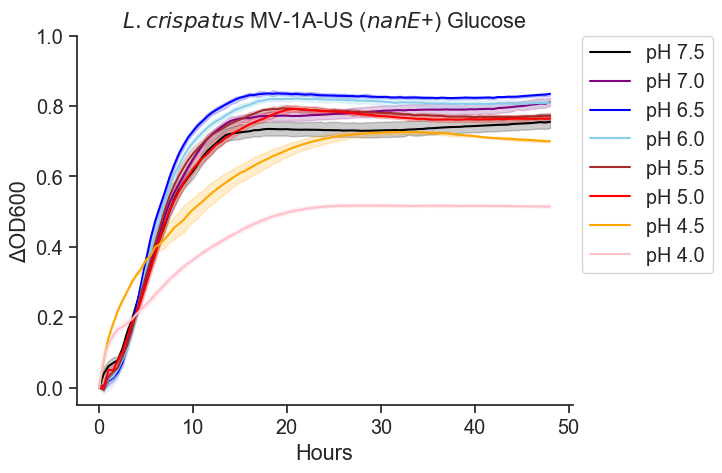

In [6]:
graphData = sliceDFBy(df111524, ['Strain', 'Treatment'], [['L. crispatus MV-1A-US'], ['Glucose']])
plot = sns.lineplot(data=graphData, x='Hours', y='Delta OD600', hue='pH', palette=pHPalette)
plot.set(ylim=(-0.05, 1.0), title='$\it{L. crispatus}$ MV-1A-US ($\it{nanE}$+) Glucose', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('11-18-24_Lcrispatus_Glucose.png'))

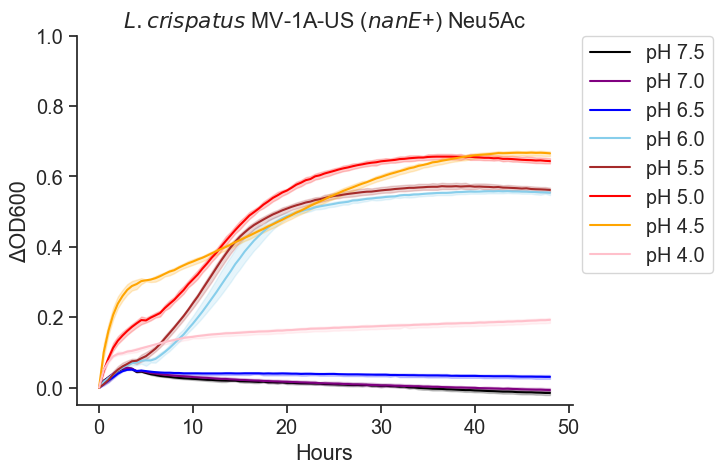

In [7]:
graphData = sliceDFBy(df111524, ['Strain', 'Treatment'], [['L. crispatus MV-1A-US'], ['Neu5Ac']])
plot = sns.lineplot(data=graphData, x='Hours', y='Delta OD600', hue='pH', palette=pHPalette)
plot.set(ylim=(-0.05, 1.0), title='$\it{L. crispatus}$ MV-1A-US ($\it{nanE}$+) Neu5Ac', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('11-18-24_Lcrispatus_Neu5Ac.png'))

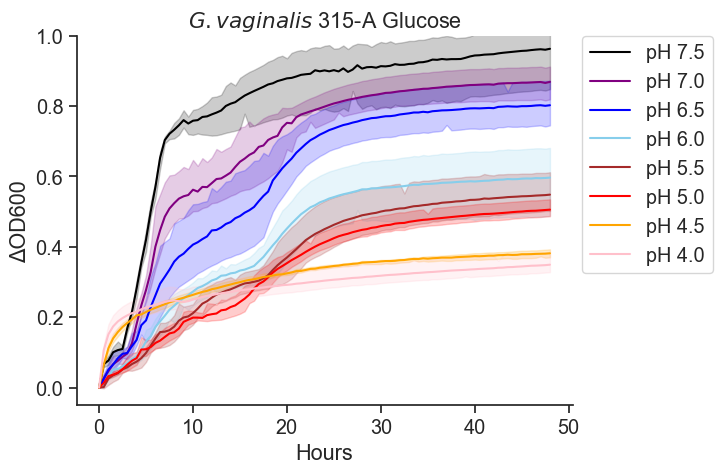

In [8]:
graphData = sliceDFBy(df111524, ['Strain', 'Treatment'], [['G. vaginalis 315-A'], ['Glucose']])
plot = sns.lineplot(data=graphData, x='Hours', y='Delta OD600', hue='pH', palette=pHPalette)
plot.set(ylim=(-0.05, 1.0), title='$\it{G. vaginalis}$ 315-A Glucose', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('11-18-24_Gvaginalis_Glucose.png'))

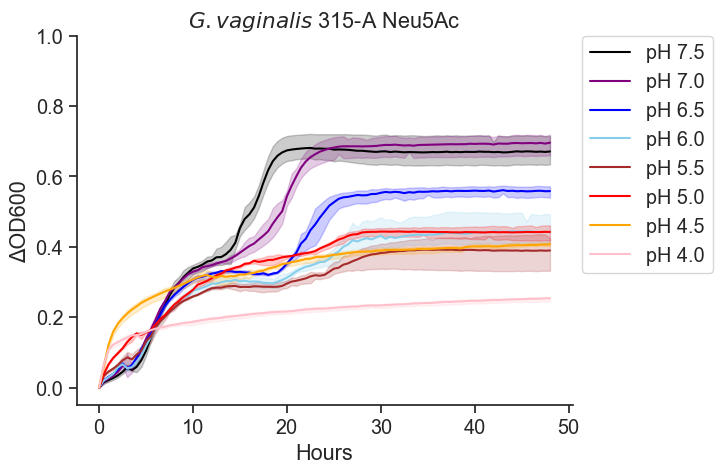

In [9]:
graphData = sliceDFBy(df111524, ['Strain', 'Treatment'], [['G. vaginalis 315-A'], ['Neu5Ac']])
plot = sns.lineplot(data=graphData, x='Hours', y='Delta OD600', hue='pH', palette=pHPalette)
plot.set(ylim=(-0.05, 1.0), title='$\it{G. vaginalis}$ 315-A Neu5Ac', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('11-18-24_Gvaginalis_Neu5Ac.png'))

In [10]:
endpoint111524 = getEndpointData(df111524, 48)
labels = []
for index, row in endpoint111524.iterrows():
    toAppend = '$\it{G. vaginalis}$' if row['Strain'] == 'G. vaginalis 315-A' else '$\it{L. crispatus}$'
    if row['Treatment'] == 'Glucose':
        toAppend += ' Glucose'
    else:
        toAppend += ' Neu5Ac'
    labels.append(toAppend)
endpoint111524['Labels'] = labels

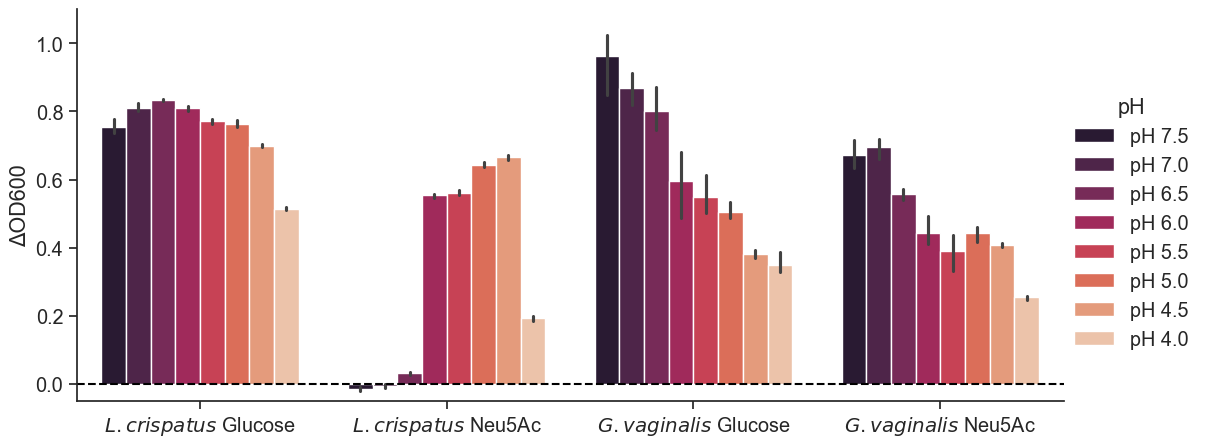

In [11]:
plot = sns.catplot(data=endpoint111524, x='Labels', y='Delta OD600', hue='pH', kind='bar', aspect=2.2, palette=sns.color_palette('rocket', 8), order=['$\it{L. crispatus}$ Glucose', '$\it{L. crispatus}$ Neu5Ac', '$\it{G. vaginalis}$ Glucose', '$\it{G. vaginalis}$ Neu5Ac'])
plot.set(ylim=(-0.05, 1.1), xlabel='', ylabel='ΔOD600')
plt.axhline(0, ls='--', color='black')
#plot.savefig(figurepath.joinpath('11-15-24_neu5Ac_pH_endpoints.png'), dpi=300, bbox_inches='tight')